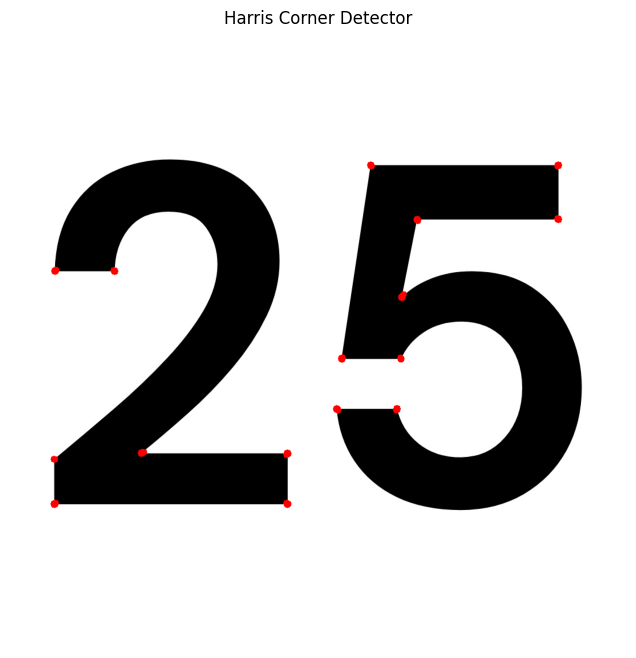

In [ ]:
import cv2  # import the OpenCV library for image processing
import numpy as np  # import numpy for numerical operations
import matplotlib.pyplot as plt  # import matplotlib for plotting

# function to perform harris corner detection
def harris_corner_detection(image, block_size=2, ksize=3, k=0.04, threshold=0.01):
    # compute gradients in x and y directions using sobel filter
    Ix = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=ksize)  # gradient in x direction
    Iy = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=ksize)  # gradient in y direction

    # compute products of gradients
    Ixx = Ix * Ix  # square of gradient in x direction
    Iyy = Iy * Iy  # square of gradient in y direction
    Ixy = Ix * Iy  # product of gradients in x and y directions

    # apply gaussian blur to smooth the gradient products
    kernel_size = (block_size * 2 + 1)  # define kernel size for gaussian blur
    Sxx = cv2.GaussianBlur(Ixx, (kernel_size, kernel_size), sigmaX=1)  # blurred gradient xx
    Syy = cv2.GaussianBlur(Iyy, (kernel_size, kernel_size), sigmaX=1)  # blurred gradient yy
    Sxy = cv2.GaussianBlur(Ixy, (kernel_size, kernel_size), sigmaX=1)  # blurred gradient xy

    # compute determinant and trace of the structure tensor
    det_M = (Sxx * Syy) - (Sxy ** 2)  # determinant of matrix
    trace_M = Sxx + Syy  # trace of matrix
    R = det_M - k * (trace_M ** 2)  # response function to identify corners

    # create a binary mask for corners based on threshold
    corners = np.zeros_like(image)  # initialize mask with zeros
    max_R = R.max()  # find maximum response value
    corners[R > threshold * max_R] = 255  # mark corners in the mask

    return corners, R  # return binary mask and response function

# read the input image in grayscale mode
image = cv2.imread("25.jpg", cv2.IMREAD_GRAYSCALE)

# check if the image is loaded successfully
if image is None:
    print("Error: Image not found.")  # print error message if image is not found
    exit()  # exit the program

# apply harris corner detection to the image
corners, response = harris_corner_detection(image)

# convert grayscale image to bgr for displaying colored corners
image_with_corners = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# set the threshold value for corner detection
threshold = 0.01  # explicitly define threshold here

# iterate through the response matrix to draw circles around corners
for y in range(response.shape[0]):  # iterate through rows
    for x in range(response.shape[1]):  # iterate through columns
        if response[y, x] > threshold * response.max():  # check if response exceeds threshold
            cv2.circle(image_with_corners, (x, y), radius=5, color=(0, 0, 255), thickness=-1)  # draw red circle

# display the result using matplotlib
plt.figure(figsize=(8, 8))  # set figure size
plt.imshow(cv2.cvtColor(image_with_corners, cv2.COLOR_BGR2RGB))  # convert image from bgr to rgb
plt.title("Harris Corner Detector")  # set title
plt.axis("off")  # hide axes
plt.show()  # show the image
